In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from PyAstronomy import pyasl
%matplotlib inline

[       -inf -0.04549827 -0.02647459 -0.01236531  0.          0.01318153
  0.02692559  0.04602543         inf]
[       -inf -0.10638416 -0.06196871 -0.02992668  0.          0.02955439
  0.06292845  0.10813969         inf]
[       -inf -0.12130483 -0.07114242 -0.03448309  0.          0.02992273
  0.06490725  0.11149986         inf]
[       -inf -0.36610362 -0.214248   -0.10318765  0.          0.09662282
  0.2120829   0.36456694         inf]
[       -inf -0.18064947 -0.10613151 -0.05050921  0.          0.05004761
  0.10628725  0.17747004         inf]
[       -inf -0.90464788 -0.53851287 -0.2585894   0.          0.24814558
  0.52506043  0.90752041         inf]
[       -inf -0.32770471 -0.20019629 -0.10000652  0.          0.07606448
  0.1749924   0.30058937         inf]
[       -inf -3.1387926  -1.81359415 -0.83160441  0.          0.86521797
  1.81733132  3.08001652         inf]


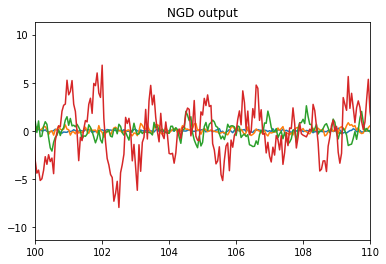

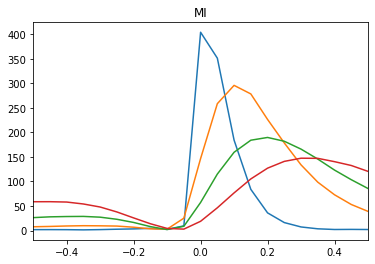

In [6]:
# HMM
Tot=1000
dt=0.05
T=np.arange(dt,Tot,dt)
para=[20,10,7.5,5] # different values of parameter Gamma in HMM 
mpara=[5,20,50,150] # different values of filter order m in UNGD filter
for ipara in range(len(para)):
    paramter=para[ipara]    
    G = paramter # change different parameters
    w = G/(2*1.06)
    D=4
    L=np.zeros(len(T))
    V=np.zeros(len(T))
    mu, sigma = 0, 1
    for i in range(len(T)-1):
        L[i+1]=L[i]+V[i]*dt
        V[i+1]=(1-G*dt)*V[i]-w**2*L[i]*dt+math.sqrt(D*dt)*np.random.normal(mu, sigma)
    


# UNGD output
    x=L
    m=mpara[ipara]
    b=(3+m)/2
    FBsum=np.zeros(len(L))
    for k in range(m):
        fb=np.zeros(len(x))
        for i in range(len(x)):
            ck=(k+1)/m
            ytime=i/dt-(m-k)*dt
            ind=int(ytime*dt)
            if ind>0:
                fb[i]=ck*x[ind]
            elif ind<=0:
                fb[i]=0
        FBsum=FBsum+fb
    y=(3+m)/2*x-FBsum
    plt.figure(num=2)
    plt.title('NGD output')
    plt.plot(T,y)
    plt.xlim(100,110)
    
# assign data to different state
# state number should be even
    nx=8
    ny=8

    # states of input
    xs=x
    xs=np.sort(x)
    xstatestep=len(xs)/nx
    xinterval=[0]
    for i in range(int(nx/2-1)):
        xinterval=np.append(xinterval,xs[round(len(xs)/2)+(i+1)*round(xstatestep)])
    xinterval=np.append(xinterval,float('inf'))
    for j in range(int(nx/2-1)):
        xinterval=np.append(xs[round(len(xs)/2)-(j+1)*round(xstatestep)],xinterval)
    xinterval=np.append(float('-inf'),xinterval)
    print(xinterval)
    xstate=np.zeros(len(x))
    for i in range(len(x)):
        tempinterval=[]
        state=[]
        tempinterval=np.array(xinterval)
        tempinterval=np.append(tempinterval,x[i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==x[i])
        xstate[i]=state[0][0]

    # states of output
    ys=y
    ys=np.sort(y)
    ystatestep=len(ys)/ny
    yinterval=[0]
    for i in range(int(ny/2-1)):
        yinterval=np.append(yinterval,ys[round(len(ys)/2)+(i+1)*round(ystatestep)])
    yinterval=np.append(yinterval,float('inf'))
    for j in range(int(ny/2-1)):
        yinterval=np.append(ys[round(len(ys)/2)-(j+1)*round(ystatestep)],yinterval)
    yinterval=np.append(float('-inf'),yinterval)
    print(yinterval)
    ystate=np.zeros(len(y))
    for i in range(len(y)):
        tempinterval=[]
        state=[]
        tempinterval=np.array(yinterval)
        tempinterval=np.append(tempinterval,y[i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==y[i])
        ystate[i]=state[0][0]
        
        
# calculating mutual information
    negshift=-1 # second
    posshift=1 # second
    shiftdu=dt # second
    shiftlen=(posshift-negshift)/dt+1
    timeshift=np.linspace(negshift,posshift,shiftlen)
    bitshift=np.linspace(negshift/dt,posshift/dt,shiftlen)
    xedges=np.linspace(1,nx+1,nx+1) # states of x
    yedges=np.linspace(1,ny+1,ny+1) # states of y

    # shifted data
    # shift>0 => y shifted to positive side
    MI=np.zeros(len(bitshift))
    for i in range(len(bitshift)):
        xx=[]
        yy=[]
        shift=int(bitshift[i])
        if shift>0:
            xx=xstate[shift:]
            yy=ystate[:-shift]
        elif shift==0:
            xx=xstate
            yy=ystate
        elif shift<0:
            xx=xstate[:shift]
            yy=ystate[-shift:]

        H, xedges, yedges = np.histogram2d(xx, yy, bins=(xedges, yedges))
        statesum=np.sum(H)
        px_list=np.sum(H,axis=1)/statesum
        py_list=np.sum(H,axis=0)/statesum
        pxy_list=H/statesum

        MIsingle=np.zeros(len(xx))
        for j in range(len(xx)):
            px=px_list[int(xx[j]-1)]
            py=py_list[int(yy[j]-1)]
            pxy=pxy_list[int(xx[j]-1)][int(yy[j]-1)]
            MIsingle[j]=pxy*math.log2(pxy/px/py)
        MI[i]=np.sum(MIsingle)
    plt.figure(num=3)
    plt.title('MI')
    plt.plot(timeshift,MI)
    plt.xlim(-0.5,0.5)